In [2]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# https://github.com/saidileep-knv/Multi-Class-Image-Classification
train_ds = tf.keras.utils.image_dataset_from_directory(
  'dataset2',
  validation_split=0.3,
  subset='training',
  seed=42,
  image_size=(128, 128),
  batch_size=32,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
  'dataset2',
  validation_split=0.3,
  subset='validation',
  seed=42,
  image_size=(128, 128),
  batch_size=32,
)

Found 1125 files belonging to 4 classes.
Using 788 files for training.
Found 1125 files belonging to 4 classes.
Using 337 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['cloudy', 'rain', 'shine', 'sunrise']


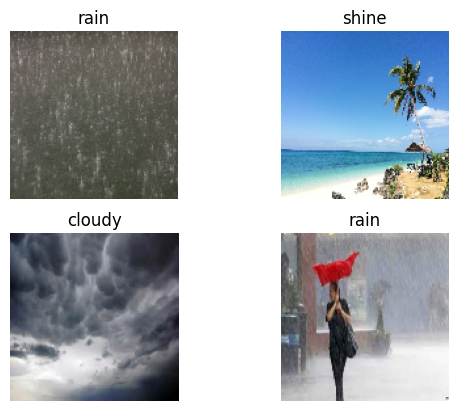

In [5]:
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [6]:
for images_batch, labels_batch in train_ds:
  print(images_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
images_batch, labels_batch = next(iter(normalized_ds))
first_image = images_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [8]:
num_classes = 4
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [10]:
model.fit(train_ds, epochs=3)

Epoch 1/3


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 11s 359ms/step - loss: 0.8719 - accuracy: 0.5990
Epoch 2/3
25/25 [==============================] - 9s 349ms/step - loss: 0.5149 - accuracy: 0.8135
Epoch 3/3
25/25 [==============================] - 8s 305ms/step - loss: 0.4274 - accuracy: 0.8287


In [11]:
predictions = model.predict(test_ds)
print(predictions)

11/11 [==============================] - 2s 68ms/step
[[4.20694768e-01 3.27978373e-01 1.43401712e-01 1.07925236e-01]
 [8.56831670e-01 4.84203622e-02 9.19387341e-02 2.80933431e-03]
 [1.02780975e-01 8.19850206e-01 7.43259713e-02 3.04281595e-03]
 ...
 [1.36424452e-01 1.37086557e-02 8.34479213e-01 1.53876664e-02]
 [1.38955335e-13 9.57719906e-13 3.74172764e-08 1.00000000e+00]
 [2.99671795e-02 8.75600278e-01 5.62168323e-02 3.82157154e-02]]


In [12]:
predictions = np.argmax(predictions, axis=1)
print(predictions, len(predictions))

[0 0 1 0 2 1 3 3 2 3 0 2 3 3 1 0 0 2 3 1 1 3 3 0 3 3 3 2 3 1 2 1 3 0 2 0 2
 0 3 3 1 0 1 1 3 2 3 2 3 1 3 0 0 2 3 1 1 3 2 3 1 2 3 0 2 0 3 3 3 3 3 1 3 3
 2 1 3 2 3 3 0 2 3 0 0 0 3 2 3 2 2 0 3 2 0 0 2 2 2 2 2 3 1 0 2 0 3 1 1 2 0
 1 0 3 1 3 0 2 2 1 0 0 0 1 1 2 1 3 0 2 3 3 0 2 3 2 3 3 1 3 2 0 3 0 2 2 3 3
 0 3 3 2 1 2 0 0 3 3 3 3 1 3 0 3 2 3 1 2 1 2 3 1 3 2 2 0 2 0 2 0 2 1 3 2 3
 3 3 3 0 0 2 3 3 2 3 2 2 0 3 2 0 0 1 3 2 2 3 3 2 3 3 2 2 2 3 2 3 2 2 2 2 3
 2 3 2 2 3 3 2 3 1 3 3 0 1 2 2 0 2 1 3 2 3 3 1 2 2 2 3 3 1 0 2 3 1 0 3 3 1
 3 2 3 1 2 1 0 0 3 0 0 1 2 3 3 3 2 2 0 0 3 2 0 3 0 3 2 3 3 2 3 3 3 3 1 1 1
 1 3 3 0 1 2 2 2 0 0 2 2 2 3 0 2 3 2 2 2 1 2 2 3 3 0 1 0 3 1 3 0 1 0 1 0 3
 0 2 3 1] 337


In [13]:
test = np.asarray([label for _, label in test_ds.unbatch()])
print(test, len(test))

[1 3 3 2 0 0 0 1 3 3 3 3 1 1 3 3 3 2 1 3 3 2 1 2 3 2 3 3 3 0 3 0 1 0 1 1 0
 3 2 3 3 0 3 0 0 0 2 3 0 0 0 0 0 3 0 1 2 2 3 3 3 2 2 1 2 0 0 2 3 3 3 2 1 3
 3 3 3 3 2 0 2 1 2 2 1 3 3 2 2 0 3 2 2 3 3 1 3 0 3 2 0 2 3 2 3 3 2 1 2 1 3
 0 2 1 0 1 0 0 2 3 3 3 0 3 2 1 3 1 3 1 0 0 3 2 0 2 1 3 1 3 1 0 3 3 3 0 2 3
 3 0 1 0 0 3 3 2 0 3 3 0 1 2 3 3 3 2 3 0 3 0 0 3 0 1 0 2 1 2 0 2 2 0 3 1 1
 3 2 1 3 0 0 1 3 3 3 2 3 1 2 3 1 0 1 0 3 0 2 1 0 1 0 3 2 0 3 3 2 3 0 3 3 0
 0 2 3 1 0 2 3 2 0 3 1 0 0 1 0 0 0 2 3 3 2 3 0 3 0 3 3 3 0 3 1 2 3 0 3 0 3
 1 1 1 2 1 1 3 2 0 0 1 3 2 2 3 3 3 2 0 3 3 2 3 3 0 0 3 2 2 3 1 0 3 0 0 1 3
 1 2 1 2 3 2 2 1 3 0 2 2 3 2 0 0 2 0 2 1 0 2 0 3 3 3 1 0 3 1 3 1 2 0 2 1 1
 3 3 1 2] 337


In [14]:
print(accuracy_score(test, predictions))

0.26409495548961426


In [15]:
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        84
           1       0.19      0.17      0.18        60
           2       0.21      0.27      0.24        73
           3       0.33      0.33      0.33       120

    accuracy                           0.26       337
   macro avg       0.25      0.25      0.25       337
weighted avg       0.27      0.26      0.26       337



<Axes: >

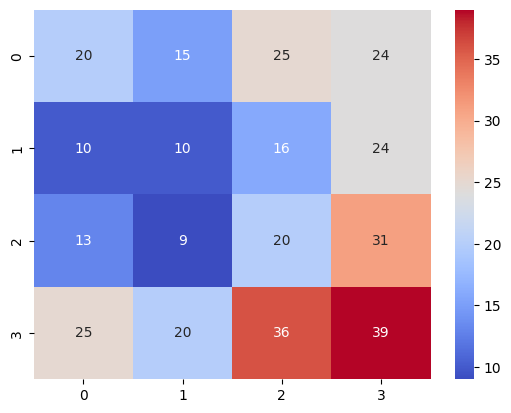

In [16]:
sns.heatmap(confusion_matrix(test, predictions), cmap="coolwarm", annot=True, fmt="d")

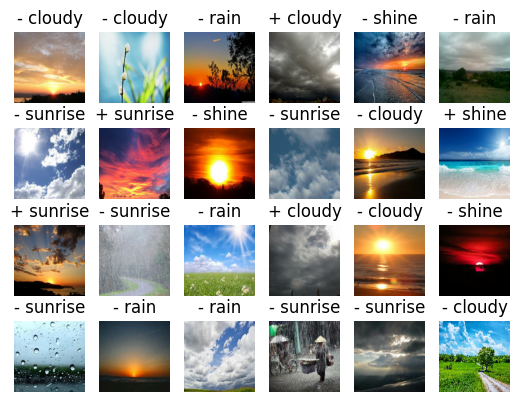

In [17]:
for images, labels in test_ds.take(1):
  for i in range(24):
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(('+ ' if class_names[predictions[i]] == class_names[labels[i]] else '- ') + class_names[predictions[i]])
    plt.axis('off')